In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

In [161]:
data = pd.read_csv("atprice (2).csv", sep=';', encoding='ISO-8859-1')

In [164]:
data = data[['model', 'transmission', 'fuelType', "productionDate",'milage','priceEuro']]
data = data.rename(columns={"productionDate": "year", "priceEuro":"price"})

In [165]:
print("Shape of train data Before dropping any Row: ",data.shape)
data = data[data['transmission'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",data.shape)
data = data[data['fuelType'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",data.shape)
data = data.reset_index(drop=True)
print(data.shape)

Shape of train data Before dropping any Row:  (155178, 6)
Shape of train data After dropping Rows with NULL values in Mileage:  (133044, 6)
Shape of train data After dropping Rows with NULL values in Engine :  (129321, 6)
(129321, 6)


In [169]:
test = data[['milage',"price"]]
z = np.abs(stats.zscore(test))
outliers = np.where(z > 3)
data = data.drop(data.index[outliers[0]])
data = data.reset_index(drop=True)
print(data.shape)

(125874, 6)


In [191]:
data = data[data['year'] > 2011].reset_index(drop=True)

In [187]:
data = data[data['milage'] < 230000].reset_index(drop=True)

In [194]:
data['fuelType'].value_counts()

Diesel      61421
Petrol      37606
Electric     4482
Hybrid       4217
Name: fuelType, dtype: int64

In [175]:
data = data[data['fuelType'] != "Ethanol"].reset_index(drop=True)
print(data.shape)
data = data[data['fuelType'] != "LPG"].reset_index(drop=True)
print(data.shape)
data = data[data['fuelType'] != "CNG"].reset_index(drop=True)
print(data.shape)

(121183, 6)
(121154, 6)
(121119, 6)


In [196]:
counts = data['model'].value_counts()
to_keep = counts[counts > 10].index
print(data.shape)
data = data[data['model'].isin(to_keep)]
print(data.shape)


(107726, 6)
(107161, 6)


In [204]:
train_data = data

In [ ]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
train_data['model'] = le.fit_transform(train_data['model'])
train_data['transmission'] = le.fit_transform(train_data['transmission'])
train_data['fuelType'] = le.fit_transform(train_data['fuelType'])


In [210]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data[['year', 'milage']] = scaler.fit_transform(train_data[['year', 'milage']])


In [215]:
from sklearn.model_selection import cross_val_score

In [214]:
def Definedata():
    data2 = train_data
    X = data2.drop("price", axis=1)
    y = data2['price']
    return X, y


In [217]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


def Models(models):
    
    model = models
    X, y = Definedata()
    scores = cross_val_score(model, X, y, cv=5)
    print("Cross-validation scores: {}".format(scores))
    print("Cross-validation mean score: {:.2f}".format(scores.mean()))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = train_data.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()



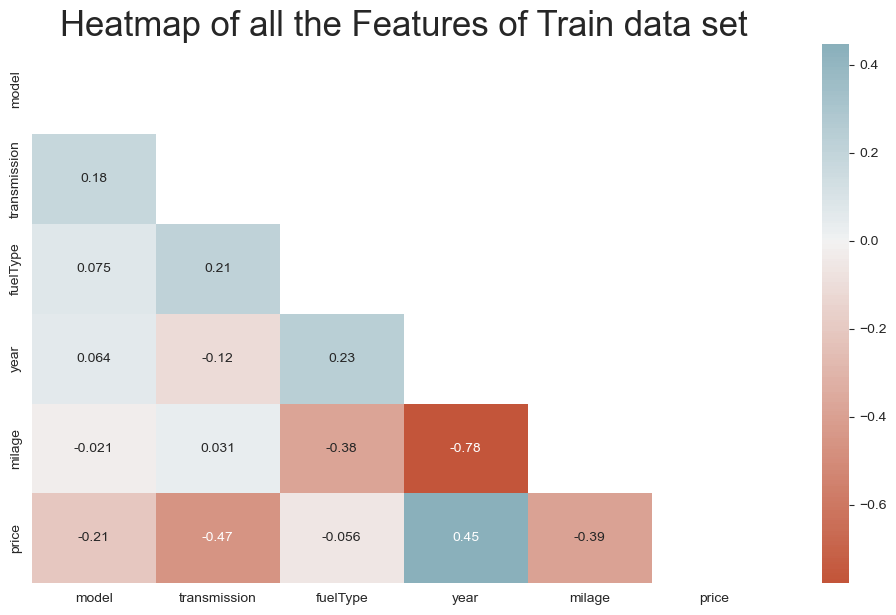

In [216]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
mask = np.zeros_like(train_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [218]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [219]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

In [220]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
4,AdaBoostRegressor,15622.406417,0.363044,0.358933
3,MLPRegressor,14265.611543,0.466848,0.465450
1,XGBRegressor,6489.485195,0.906433,0.889381
0,DecisionTreeRegressor,5909.428817,0.992247,0.908273
5,ExtraTreesRegressor,5247.920927,0.992247,0.927659
2,RandomForestRegressor,5149.718174,0.984731,0.930341


Cross-validation scores: [0.75053045 0.49970892 0.62056983 0.94605914 0.97050841]
Cross-validation mean score: 0.76
		Error Table
Mean Absolute Error      :  3317.0614936472994
Mean Squared  Error      :  34006029.91825333
Root Mean Squared  Error :  5831.468933146548
Accuracy on Traing set   :  0.9806155103226307
Accuracy on Testing set  :  0.9106770142043437


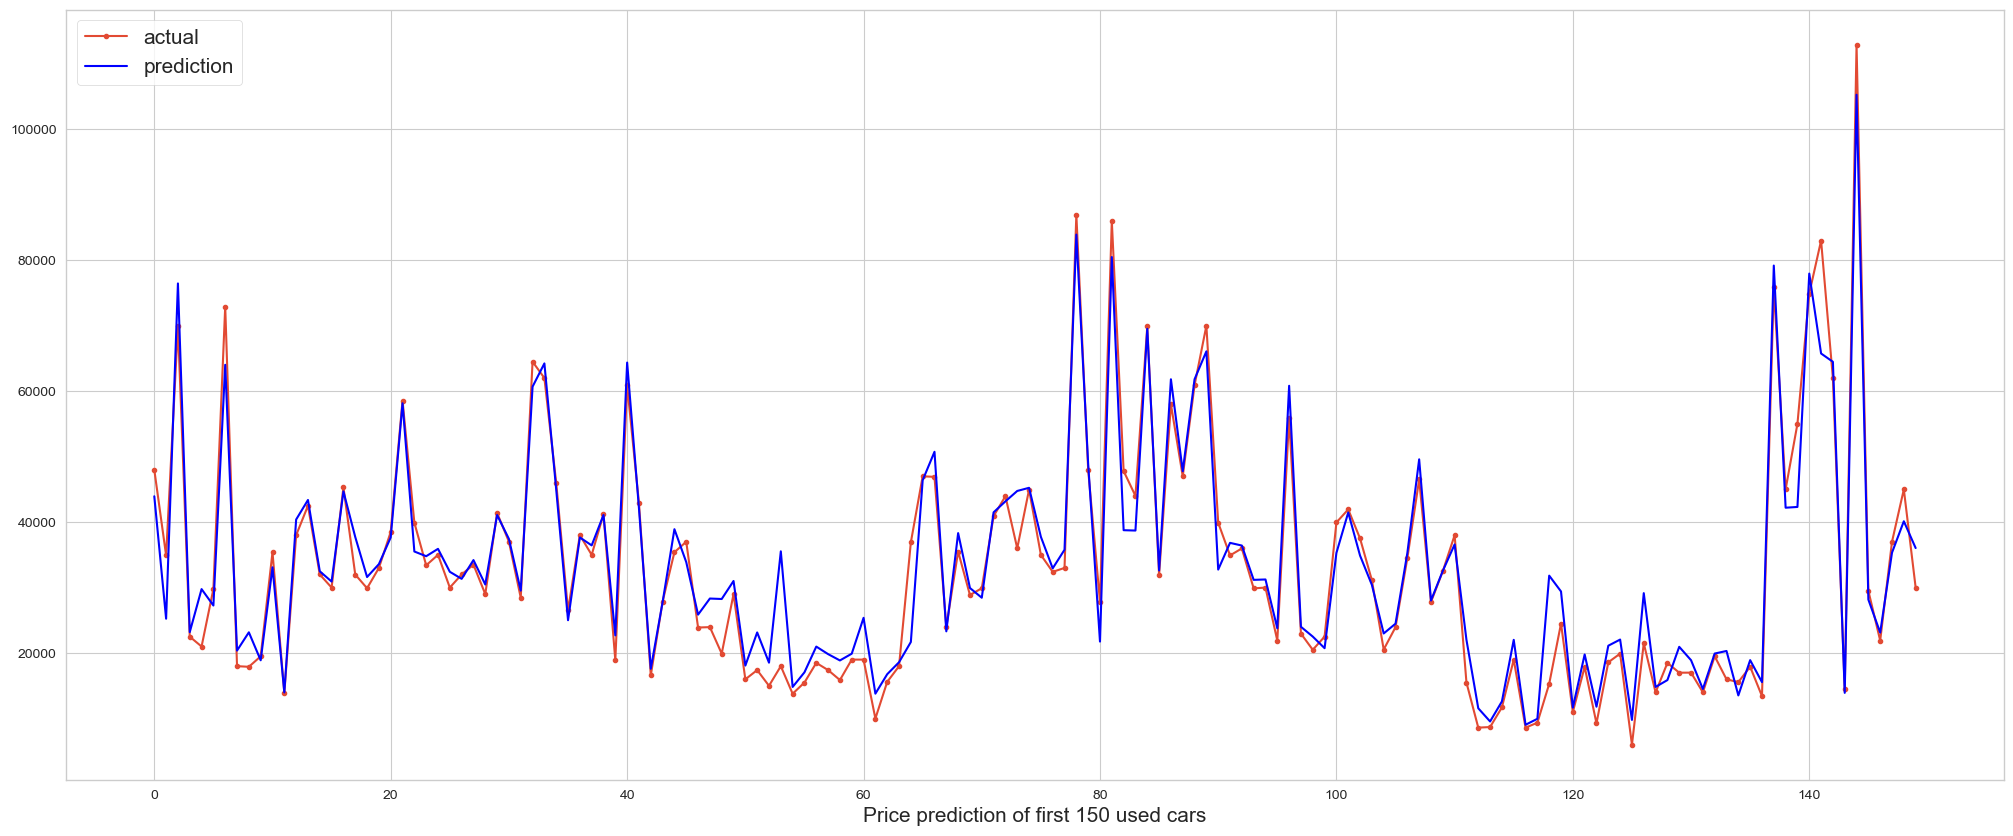

In [221]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(150, y_actual, y_predicted )

In [227]:
model = RandomForestRegressor(random_state=21, n_estimators=5000)
feature1 = ['model', 'transmission', 'fuelType', 'year', 'milage']

X0 = res_data[feature1]
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
model.fit(X_train,y_train)
y_predicted = model.predict(X0)

submission = pd.DataFrame({'Car_id': res_data.index,'predicted_price':y_predicted, 'actual_price':train_data.price}) 
submission.head(10)

,Car_id,predicted_price,actual_price
0,0,46558.422400,47990
1,1,31123.816833,34900
2,2,81509.279074,69900
3,3,23195.413200,22490
4,4,29717.346117,20990
5,5,28990.034714,29780
6,6,62483.521642,72900
8,8,20033.938221,17990
9,9,22883.944800,17890
10,10,18927.691610,19490


In [772]:
filename = 'submission.csv'

submission.to_csv(filename,index=True)

print('Saved file: ' + filename)

Saved file: submission.csv
